In [1]:
%matplotlib inline

In [2]:
import sqlite3
import pandas as pd 

In [3]:
def db_sql_query(db_name,QUERY):
    """perform QUERY on db_name. Dataframe is returned with result of the query (data and column names)"""
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    c.execute(QUERY)
    columns = [d[0] for d in c.description] 
    results = c.fetchall()
    df = pd.DataFrame(data=results,columns=columns)
    conn.close()
    return df

In [4]:
db_name='Toulouse_osm.db'

# number of unique user

In [5]:
QUERY='''SELECT count(sub_query.uid) as unique_user
FROM
(SELECT uid
FROM NODE
GROUP BY uid) as sub_query
'''
df=db_sql_query(db_name,QUERY)
df.head()

,unique_user
0,1500


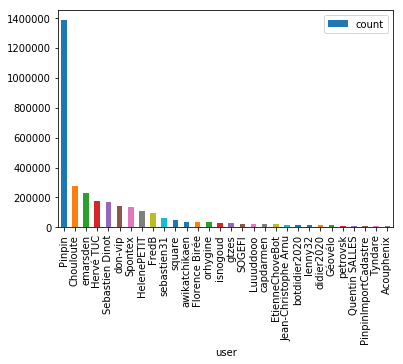

In [6]:
QUERY='''SELECT uid, user, count(uid) as count
FROM NODE
GROUP BY uid
ORDER BY count DESC
'''
df=db_sql_query(db_name,QUERY)
df[df['count']>10000].plot(kind='bar',x='user',y='count')

# Number of nodes and ways

In [7]:
QUERY='''SELECT count(id) as nb_nodes
FROM NODE
'''
df1=db_sql_query(db_name,QUERY)

QUERY='''SELECT count(id) as nb_ways
FROM WAY
'''
df2=db_sql_query(db_name,QUERY)

df=pd.concat([df1, df2], axis=1)
df

,nb_nodes,nb_ways
0,3495082,594288


# Amenities

In [8]:
QUERY='''SELECT *
FROM
    (SELECT *, count(value) as count
    FROM NODE_TAG
    WHERE key='amenity'
    GROUP BY value
    ORDER BY count DESC) as subquery
WHERE count>100
'''
df=db_sql_query(db_name,QUERY)
df

,id,key,value,type,count
0,5917722323,amenity,recycling,regular,1304
1,5917663734,amenity,bench,regular,1106
2,5919134804,amenity,restaurant,regular,904
3,5909794812,amenity,waste_basket,regular,594
4,5913575574,amenity,post_box,regular,565
5,5915915480,amenity,bicycle_parking,regular,514
6,5792706053,amenity,fast_food,regular,380
7,5844045418,amenity,parking,regular,337
8,5907965112,amenity,bank,regular,296
9,5839550737,amenity,bicycle_rental,regular,285


# Restaurant analysis

## List all cuisine type and number of restaurant for each type

In [18]:
QUERY='''SELECT *
FROM
    (SELECT cuisine, count(cuisine) as count
    FROM
        (SELECT id
        FROM NODE_TAG
        WHERE key='amenity'
        AND value='restaurant') as subquery_id
    LEFT JOIN
        (SELECT id, value as cuisine
        FROM NODE_TAG
        WHERE key='cuisine') as subquery_cuisine
    ON subquery_id.id=subquery_cuisine.id
    GROUP BY cuisine
    ORDER BY count(cuisine) DESC) as subquery_count
WHERE count>=3
'''
df=db_sql_query(db_name,QUERY)
df

,cuisine,count
0,french,90
1,pizza,65
2,regional,47
3,asian,32
4,japanese,27
5,italian,26
6,indian,22
7,chinese,19
8,vietnamese,17
9,burger,7


## List all restaurants with regional cuisine <br>
Following details are also provided: name, cuisine, phone, website, latitude and longitude <br>

In [10]:
QUERY='''SELECT subquery_id.id, name, cuisine, phone, website, lat, lon
FROM
    (SELECT id
    FROM NODE_TAG
    WHERE key='amenity'
    AND value='restaurant') as subquery_id
LEFT JOIN
    (SELECT id, value as name
    FROM NODE_TAG
    WHERE key='name') as subquery_name
ON subquery_id.id=subquery_name.id
LEFT JOIN
    (SELECT id, value as cuisine
    FROM NODE_TAG
    WHERE key='cuisine') as subquery_cuisine
ON subquery_id.id=subquery_cuisine.id
LEFT JOIN
    (SELECT id, value as phone
    FROM NODE_TAG
    WHERE key='phone') as subquery_phone
ON subquery_id.id=subquery_phone.id
LEFT JOIN
    (SELECT id, value as website
    FROM NODE_TAG
    WHERE key='website') as subquery_website
ON subquery_id.id=subquery_website.id
JOIN NODE
ON subquery_id.id=NODE.id
WHERE cuisine='regional'
'''
df=db_sql_query(db_name,QUERY)
df

,id,name,cuisine,phone,website,lat,lon
0,259131130,L'Écluse de Castanet,regional,None,None,43.523510,1.519007
1,450161376,La Cave au Cassoulet,regional,+33 5 61 13 60 30,None,43.602051,1.441060
2,520124626,Le Bon Vivre,regional,None,None,43.605308,1.447199
3,615204677,Buffalo Grill,regional,None,None,43.553785,1.483223
4,630662464,L'Oncle Pom,regional,+33 5 61 54 39 86,http://www.lonclepom.com/,43.606196,1.455216
5,766485053,Le p'tit resto,regional,+33 5 61 73 66 74,None,43.518524,1.506090
6,769244212,L'Accessoire,regional,+33 5 61 42 79 05,http://restaurant-laccessoire.over-blog.com/,43.596443,1.432838
7,772900237,Mamie et les Ours,regional,+33561215533,None,43.609194,1.438997
8,773250510,Bois et Charbon,regional,+33 5 61 63 61 21,http://www.boisetcharbon.net/,43.604766,1.454725
9,776623621,L'Aubrac,regional,None,None,43.604395,1.451352


# Bicycle/ car parking analysis

## list of parking type

In [11]:
QUERY='''SELECT value as bicycle_parking_type
FROM NODE_TAG
WHERE key='bicycle_parking'
GROUP BY bicycle_parking_type
'''
df1=db_sql_query(db_name,QUERY)

QUERY='''SELECT value as car_parking_type
FROM NODE_TAG
WHERE key='parking'
GROUP BY car_parking_type
'''
df2=db_sql_query(db_name,QUERY)

df=pd.concat([df1, df2], axis=1)
df

,bicycle_parking_type,car_parking_type
0,anchors,carpool
1,bollard,disabled
2,building,multi-storey
3,lockers,surface
4,rack,underground
5,shed,NaN
6,stands,NaN
7,wall_loops,NaN
8,wide_stands,NaN
9,yes,NaN


## total parking capacity

In [12]:
QUERY='''SELECT sum(capacity) as bicycle_parking_capacity
FROM 
    (SELECT id
    FROM NODE_TAG
    WHERE value='bicycle_parking') as subquery_id
LEFT JOIN
    (SELECT id, value as capacity
    FROM NODE_TAG
    WHERE key='capacity') as subquery_capacity
ON subquery_id.id=subquery_capacity.id
'''
df1=db_sql_query(db_name,QUERY)

QUERY='''SELECT sum(capacity) as car_parking_capacity
FROM 
    (SELECT id
    FROM NODE_TAG
    WHERE value='parking') as subquery_id
LEFT JOIN
    (SELECT id, value as capacity
    FROM NODE_TAG
    WHERE key='capacity') as subquery_capacity
ON subquery_id.id=subquery_capacity.id
'''
df2=db_sql_query(db_name,QUERY)

df=pd.concat([df1, df2], axis=1)
df

,bicycle_parking_capacity,car_parking_capacity
0,4014,8116


# School analysis

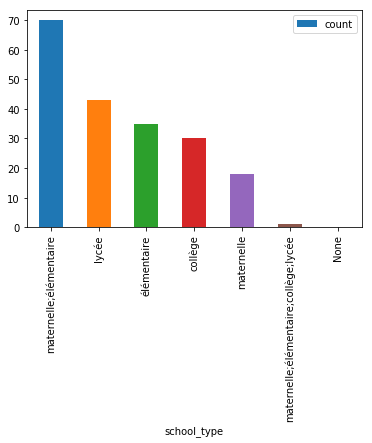

In [13]:
QUERY='''SELECT school_type, count(school_type) as count
FROM 
    (SELECT id
    FROM NODE_TAG
    WHERE value='school') as subquery_id
LEFT JOIN
    (SELECT id, value as school_type
    FROM NODE_TAG
    WHERE key='school:FR') as subquery_school_type
ON subquery_id.id=subquery_school_type.id
GROUP BY school_type
ORDER BY count DESC
'''
df=db_sql_query(db_name,QUERY)
df.plot(kind='bar',x='school_type',y='count')

# City population analysis

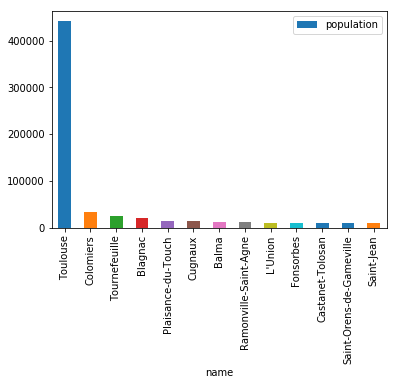

In [14]:
QUERY='''SELECT name, population
FROM
    (SELECT id
    FROM NODE_TAG
    WHERE key='population'
    AND type='regular') as subquery_id
LEFT JOIN
    (SELECT id, value as name
    FROM NODE_TAG
    WHERE key='name') as subquery_name
ON subquery_id.id=subquery_name.id
LEFT JOIN
    (SELECT id, CAST(value AS INT) as population
    FROM NODE_TAG
    WHERE key='population'
    AND type='regular') as subquery_population
ON subquery_id.id=subquery_population.id
ORDER BY population DESC
'''
df=db_sql_query(db_name,QUERY)
df[df['population']>10000].plot(kind='bar',x='name',y='population')

In [15]:
QUERY='''SELECT sum(population) as total_population
FROM
    (SELECT id
    FROM NODE_TAG
    WHERE key='population'
    AND type='regular') as subquery_id
LEFT JOIN
    (SELECT id, CAST(value AS INT) as population
    FROM NODE_TAG
    WHERE key='population'
    AND type='regular') as subquery_population
ON subquery_id.id=subquery_population.id
'''
df=db_sql_query(db_name,QUERY)
df.head()

,total_population
0,861043
